In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

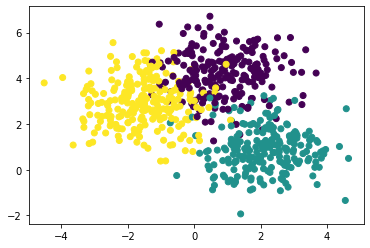

In [112]:
X, y = make_blobs(n_samples=1000, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [113]:
class KNNCustom:
    
    def __init__(self, n_neighnours=5):
        self.n_neighnours = n_neighnours
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        
    def __predict_point(self, point):
        distances = np.sum((self.__X - point) ** 2, axis=1) ** .5
        
        indices = np.argsort(distances)[:self.n_neighnours]
        votes = self.__y[indices]
        labels, votes = np.unique(votes, return_counts=True)
        return labels[np.argmax(votes)]
    
    def predict(self, X):
        
        results = []
        
        for point in X:
            results.append(self.__predict_point(point))
        
        return np.array(results)
    
    def score(self, X, y):
        yp = self.predict(X) 
        return (y == yp).mean()


In [114]:
model = KNNCustom(10)
model.fit(X_train, y_train)
model.predict(X_test[:10])

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0])

In [115]:
model.score(X_test, y_test)

0.9363636363636364

In [116]:
y_test[:10]

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0])

In [117]:
import numpy as np

In [118]:
data = np.random.randint(10, 20, [10])

In [119]:
np.unique(data, return_counts=True)

(array([10, 11, 14, 16, 17, 18, 19]), array([2, 3, 1, 1, 1, 1, 1]))

In [120]:
data

array([16, 17, 10, 14, 19, 11, 11, 10, 11, 18])

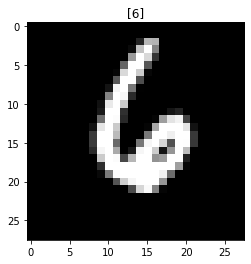

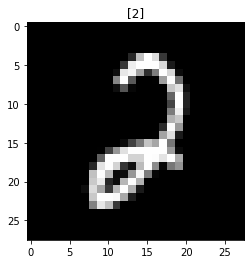

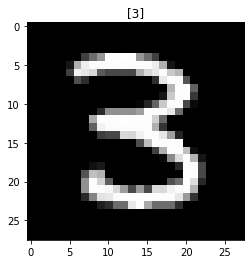

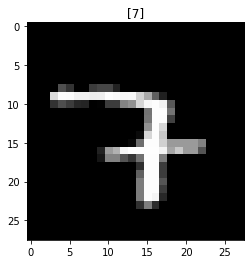

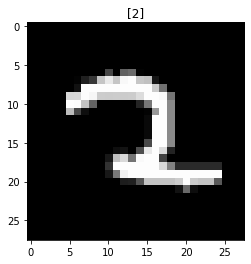

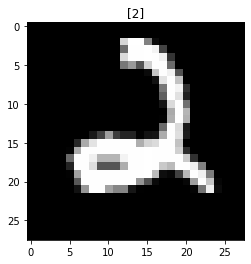

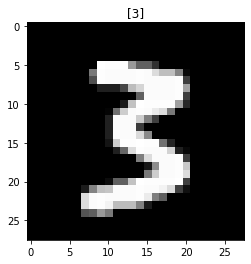

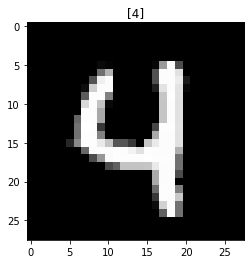

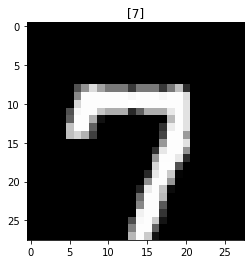

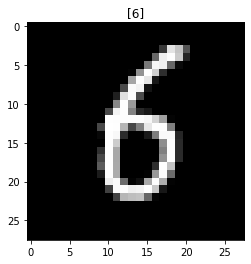

In [122]:
import pandas as pd
df = pd.read_csv("../data/mnist_test.csv")

data = df.values

X = data[:, 1:]
y = data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KNNCustom(5)

model.fit(X_train, y_train)

for img in X_test[:10]:
    plt.figure()
    plt.imshow(img.reshape([28, 28]), cmap="gray")
    plt.title(str(model.predict([img])))